<a href="https://colab.research.google.com/github/guilhermeoliveirad/CodeWave/blob/main/Codewave_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
%pip install sidrapy

In [19]:
import pandas as pd
import plotly.express as px
import numpy as np
import os

In [20]:
url='https://www.sjc.sp.gov.br/servicos/governanca/populacao/'

In [21]:
df=pd.read_html(url,header=0)


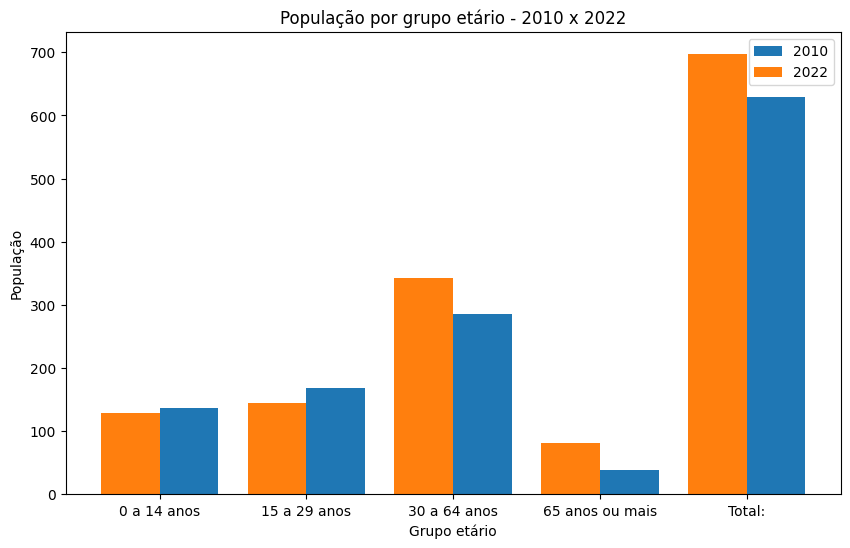

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

url='https://www.sjc.sp.gov.br/servicos/governanca/populacao/'
df=pd.read_html(url,header=0)

df1 = df[1].copy()

# remove a linha "Total"
df1 = df1[df1["Grupo etário"] != "Total"]

# Convert columns to numeric
df1["2010"] = pd.to_numeric(df1["2010"])
df1["2022"] = pd.to_numeric(df1["2022"])


# gráfico de barras agrupadas
plt.figure(figsize=(10,6))
plt.bar(df1["Grupo etário"], df1["2010"], width=0.4, label="2010", align="edge")
plt.bar(df1["Grupo etário"], df1["2022"], width=-0.4, label="2022", align="edge")

plt.title("População por grupo etário - 2010 x 2022")
plt.ylabel("População")
plt.xlabel("Grupo etário")
plt.legend()
plt.show()

In [23]:

gra_porgrupetario2010x2022 = px.bar(df1, x="Grupo etário", y=["2010", "2022"], barmode="group", title="População por grupo etário - 2010 x 2022")
gra_porgrupetario2010x2022

In [24]:
#consertando os numeros da coluna Homens
lis_h=[]
grup_quinhental=df[2]
for x in grup_quinhental['Homens (2022)']:
  if x < 100 and x!=12:
    x=x*1000
    lis_h.append(x)
  else:
    lis_h.append(x)
grup_quinhental['Homens (2022)']=lis_h
#consertando os numeros da coluna Mulheres
lis_m=[]
for x in grup_quinhental['Mulheres (2022)']:
  if x < 100 and x!=73:
    x=x*1000
    lis_m.append(x)
  else:
    lis_m.append(x)
grup_quinhental['Mulheres (2022)']=lis_m

#Fazendo o grafico
grap_quinhentalporsex = px.bar(grup_quinhental, x="Grupo quinquenal", y=["Homens (2022)", "Mulheres (2022)"], barmode="group", title="População por grupo quinzenal - Homens x Mulheres")
grap_quinhentalporsex


In [25]:
df[3]

,Região,População (2022),Domicílios particulares (2022)
0,Centro,72.401,34.663
1,Leste,181.463,70.536
2,Norte,61.940,24.193
3,Oeste,64.482,26.913
4,São Francisco Xavier (núcleo),1.443,754.000
5,Sudeste,62.541,23.410
6,Sul,237.572,91.937
7,Rural,15.212,9.808
8,Total Geral,697.054,282.214


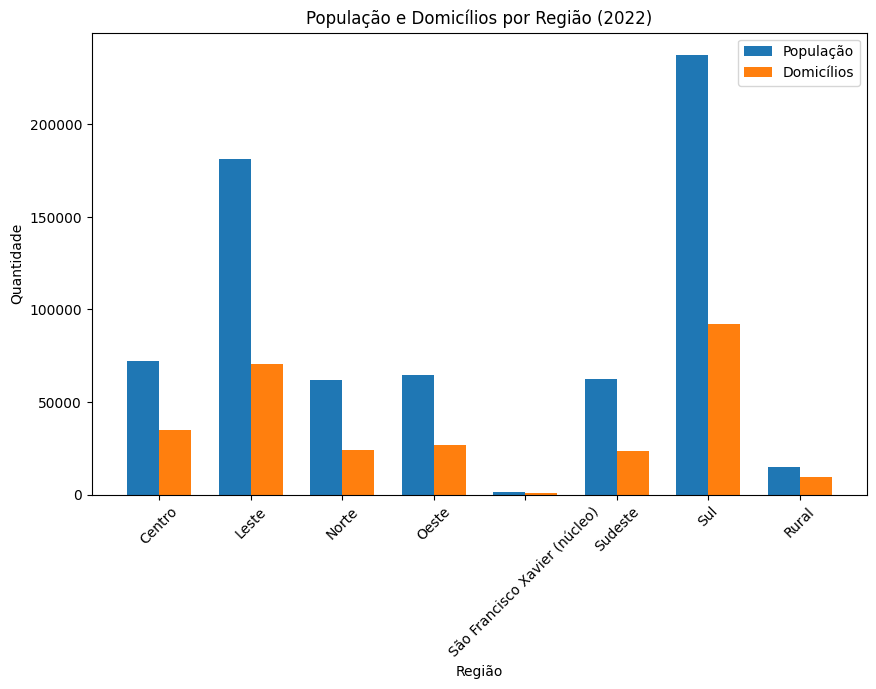

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
url='https://www.sjc.sp.gov.br/servicos/governanca/populacao/'
dfs=pd.read_html(url)
df3 = dfs[3].copy()
df3.columns = ["Região", "População", "Domicílios"]

# Remover linha de "Total Geral" e a primeira linha que contém os cabeçalhos originais
df3 = df3[df3["Região"] != "Total Geral"]
df3 = df3.iloc[1:]

# Converter valores de string para número (remove pontos de milhar)
df3["População"] = df3["População"].astype(str).str.replace(".", "").astype(int)
df3["Domicílios"] = df3["Domicílios"].astype(str).str.replace(".", "").astype(int)
x = np.arange(len(df3["Região"]))
largura = 0.35

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - largura/2, df3["População"], largura, label="População")
ax.bar(x + largura/2, df3["Domicílios"], largura, label="Domicílios")

ax.set_xlabel("Região")
ax.set_ylabel("Quantidade")
ax.set_title("População e Domicílios por Região (2022)")
ax.set_xticks(x)
ax.set_xticklabels(df3["Região"], rotation=45)
ax.legend()

In [27]:
p=df[4]
l=[]
for x in p['População (2022)']:
  if x < 100:
    x=x*1000
    l.append(x)
  else:
    l.append(x)
p['População(2022)']=l




popu_set = px.bar(p, x="Setor socioeconômico/área", y='População(2022)', title="População")
popu_set





In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
estado = pd.read_csv("/content/drive/MyDrive/dados sjc/extrair/perfil_eleitor_secao_2022_SP.csv",
                 usecols = '''NR_ZONA NR_SECAO NM_MUNICIPIO DS_FAIXA_ETARIA DS_ESTADO_CIVIL DS_GRAU_ESCOLARIDADE
                 QT_ELEITORES_INC_NM_SOCIAL QT_ELEITORES_PERFIL'''.split(),
                 sep=";", on_bad_lines = 'skip', encoding='Latin 1')
municipio = estado.query('NM_MUNICIPIO == "SÃO JOSÉ DOS CAMPOS"')
municipio = municipio.drop(columns = 'NM_MUNICIPIO')


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/dados sjc/extrair/perfil_eleitor_secao_2022_SP.csv'

In [30]:
#criando tabela da faixa etaria
FaixaEtaria = municipio.groupby(['DS_FAIXA_ETARIA'])['QT_ELEITORES_PERFIL'].sum()
FaixaEtaria

NameError: name 'municipio' is not defined

In [31]:
FaixaEtaria.plot(kind='barh', figsize=(16,10))
plt.ylabel('FAIXA ETÁRIA')
plt.grid(linestyle = '--', linewidth = 0.5)

NameError: name 'FaixaEtaria' is not defined

In [ ]:
Jovem = FaixaEtaria[1:8]
Adulto = FaixaEtaria[8:14]
Idoso = FaixaEtaria[14:22]


In [ ]:
FaixasIdade = pd.DataFrame({'SÃO JOSÉ DOS CAMPOS':[Jovem.sum(), Adulto.sum(), Idoso.sum() + int(FaixaEtaria[0])]},
                        #somando idosos acima de 100 anos que estão no ínício
                        index = ['Jovens até 29 anos', 'Adultos', 'Idosos a partir de 60'])
FaixasIdade


In [ ]:
jovens = {}
for zona in municipio.NR_ZONA.unique():
    result = municipio.query('NR_ZONA == @zona').groupby('DS_FAIXA_ETARIA')['QT_ELEITORES_PERFIL'].sum()
    jovens[zona] = result[1:8].sum()
for zona in sorted(jovens, key=lambda x:jovens[x], reverse = True):
    display (f'Zona eleitoral {zona}: {jovens[zona]}')



In [ ]:
idosos = {}
for zona in municipio.NR_ZONA.unique():
    result = municipio.query('NR_ZONA == @zona').groupby('DS_FAIXA_ETARIA')['QT_ELEITORES_PERFIL'].sum()
    idosos[zona] = result[14:22].sum() + int(result[0])
for zona in sorted(idosos, key=lambda x:idosos[x], reverse = True):
    print (f'Zona eleitoral {zona}: {idosos[zona]}')

In [ ]:
Escolaridade = municipio.groupby(['DS_GRAU_ESCOLARIDADE'])['QT_ELEITORES_PERFIL'].sum().sort_values(ascending = False)
Escolaridade

In [32]:
import sidrapy

ds = sidrapy.get_table(
    table_code = "1579",
    territorial_level = "6",
    ibge_territorial_code = "3549904",
    classifications = {

        "12045":"99401,99402,99403,99404,99405"

    }

)
ds = ds.iloc[1:]
ds

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N
1,6,Município,45,Pessoas,25824,3549904,São José dos Campos (SP),99401,Até 14 horas,2010,2010,916,"Pessoas de 10 anos ou mais de idade, ocupadas ..."
2,6,Município,45,Pessoas,42038,3549904,São José dos Campos (SP),99402,15 a 39 horas,2010,2010,916,"Pessoas de 10 anos ou mais de idade, ocupadas ..."
3,6,Município,45,Pessoas,162877,3549904,São José dos Campos (SP),99403,40 a 44 horas,2010,2010,916,"Pessoas de 10 anos ou mais de idade, ocupadas ..."
4,6,Município,45,Pessoas,40993,3549904,São José dos Campos (SP),99404,45 a 48 horas,2010,2010,916,"Pessoas de 10 anos ou mais de idade, ocupadas ..."
5,6,Município,45,Pessoas,39564,3549904,São José dos Campos (SP),99405,49 horas ou mais,2010,2010,916,"Pessoas de 10 anos ou mais de idade, ocupadas ..."


In [36]:
ds = ds.loc[:, ["V", "D2N"]]
display(ds)

,V,D2N
1,25824,Até 14 horas
2,42038,15 a 39 horas
3,162877,40 a 44 horas
4,40993,45 a 48 horas
5,39564,49 horas ou mais


In [37]:
ds["V"] = pd.to_numeric(ds["V"], errors="coerce").fillna(0)
grafico = px.bar(ds, x="D2N", y="V", barmode="group", title="População por sistema de ensino")
grafico

In [42]:
ds = ds.rename(columns={"D2N": "Faixa etaria", "V": "Quantidade"})
ds

,Quantidade,Faixa etaria
1,25824,Até 14 horas
2,42038,15 a 39 horas
3,162877,40 a 44 horas
4,40993,45 a 48 horas
5,39564,49 horas ou mais


In [43]:
ds["Quantidade"] = pd.to_numeric(ds["Quantidade"], errors="coerce").fillna(0)
grafico = px.bar(ds, x="Faixa etaria", y="Quantidade", barmode="group", title="População por sistema de ensino")
grafico